In [1]:
import pandas as pd
from alpaca.experimental_data.measurements_exp import babar_btoksnunu_lightmediator, belleII_bptoknunu_lightmediator
from alpaca.constants import mB, mK, hbarc_GeVnm
from alpaca.models.model_library import QED_DFSZ, beta, u_DFSZ, d_DFSZ
from alpaca.statistics.chisquared import chi2_obs
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12, 'text.usetex': True, 'font.family': 'serif', 'font.serif': ['Computer Modern Roman']})

In [2]:
ma = np.logspace(-1, np.log10(3), 100)
fa = np.logspace(3, 7, 100)

## QED-DFSZ

In [ ]:
couplings = [QED_DFSZ.get_couplings({beta: np.arctan(10000)}, f).match_run(3, 'VA_below', 'leadinglog') for f in fa]
x_ma, y_couplings = np.meshgrid(ma, couplings)
x_ma, y_fa = np.meshgrid(ma, fa)

In [57]:
chi2_bknunu_belleII = chi2_obs(belleII_bptoknunu_lightmediator, 'B+ -> K+ a', x_ma, y_couplings, y_fa, integrator='no_rge' )

/home/geonosis/Documents/alpaca/alp-aca/alpaca/decays/alp_decays/hadronic_decays_def.py:466: RuntimeWarning: invalid value encountered in scalar power
  return 9*ma**3/((4*np.pi)**5*fa**2)*(1-4*momega**2/ma**2)**(3/2)*np.abs(aux)**2
/home/geonosis/.cache/pypoetry/virtualenvs/alpaca-YZhijjtZ-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2458: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])


In [58]:
chi2_bknunu_babar = chi2_obs(babar_btoksnunu_lightmediator, 'B+ -> K+ a', x_ma, y_couplings, y_fa, integrator='no_rge' )

/home/geonosis/.cache/pypoetry/virtualenvs/alpaca-YZhijjtZ-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2458: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])


In [8]:
from alpaca.decays import branching_ratio
from alpaca.decays.alp_decays.branching_ratios import total_decay_width

In [ ]:
dw = np.vectorize(lambda ma, coupl, fa: total_decay_width(ma, coupl, fa, integrator='no_rge')['DW_tot'])(x_ma, y_couplings, y_fa)

/home/geonosis/.cache/pypoetry/virtualenvs/alpaca-YZhijjtZ-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2458: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])


In [ ]:
ctau = 1e-7*hbarc_GeVnm/dw

In [ ]:
prob_decay = belleII_bptoknunu_lightmediator.decay_probability(ctau, ma, theta=None)

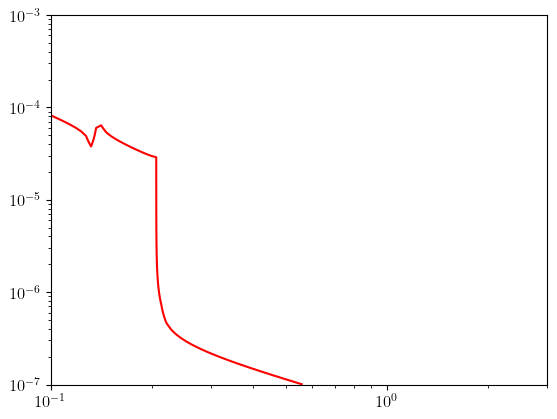

In [ ]:
plt.contour(x_ma, 1/y_fa, np.real(prob_decay), levels=[0.99], colors='r')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

In [50]:
dw = np.vectorize(lambda ma, coupl, fa: total_decay_width(ma, coupl, fa, integrator='no_rge')['DW_tot'])(2.1, couplings, fa)

In [51]:
ctau = 1e-7*hbarc_GeVnm/dw

In [52]:
prob_decay = belleII_bptoknunu_lightmediator.decay_probability(ctau, 2.1, theta=None)

In [53]:
br = branching_ratio('B+ -> K+ a', 2.1, couplings, fa, integrator='no_rge')

In [48]:
total_decay_width(2.1, couplings[75], fa[75], integrator='no_rge')

{'e': 1.7162632492292947e-21,
 'mu': 7.300318364592166e-17,
 'tau': 0.0,
 'charm': 0.0,
 'bottom': 0.0,
 '3pis': 0.0,
 'etapipi': 5.604637425978269e-16,
 'etappipi': 2.0293747777807696e-16,
 'gammapipi': 5.513664939370116e-20,
 '2omega': 1.3910129289189103e-17,
 'gluongluon': 1.5440057612258942e-15,
 '2photons': 5.837513686717275e-18,
 'DW_tot': 1.6228481748217824e-15}

In [55]:
7.300318364592166e-17/1.6228481748217824e-15

0.044984604708286226

Text(0.5, 1.0, '')

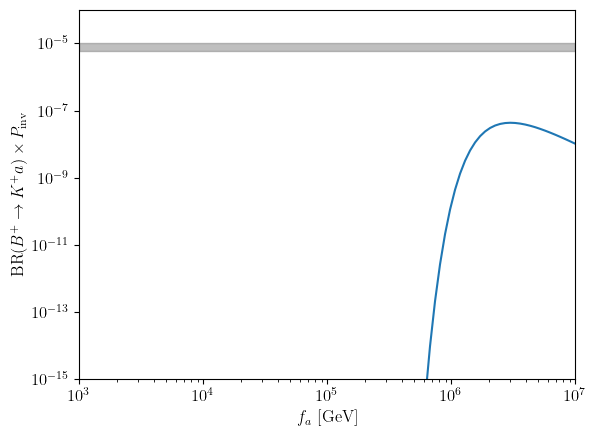

In [54]:
plt.loglog(fa, br*prob_decay)
plt.xlabel(r'$f_a$ [GeV]')
plt.ylabel(r'$\mathrm{BR}(B^+ \to K^+ a) \times P_\mathrm{inv}$')
plt.fill_between([1e3, 1e7], belleII_bptoknunu_lightmediator.get_central(np.array([2.1, 2.1]))-belleII_bptoknunu_lightmediator.get_sigma_left(np.array([2.1, 2.1])), belleII_bptoknunu_lightmediator.get_central(np.array([2.1, 2.1]))+belleII_bptoknunu_lightmediator.get_sigma_right(np.array([2.1, 2.1])), color='gray', alpha=0.5)
plt.ylim(1e-15, 1e-4)
plt.xlim(1e3, 1e7)
plt.title(r'')

Text(0, 0.5, '$\\mathrm{BR}(B^+ \\to K^+ a)$')

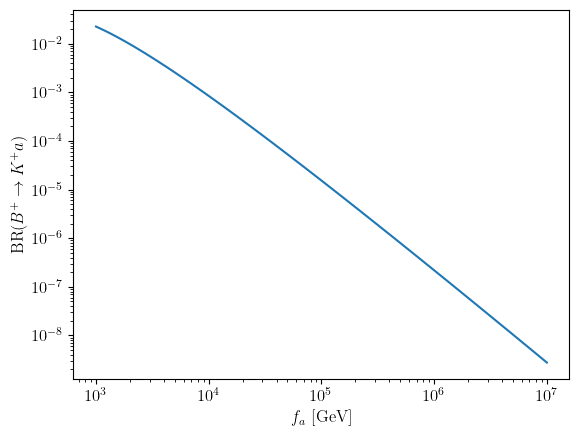

In [20]:
plt.loglog(fa, br)
plt.xlabel(r'$f_a$ [GeV]')
plt.ylabel(r'$\mathrm{BR}(B^+ \to K^+ a)$')

Text(0, 0.5, '$ P_\\mathrm{inv}$')

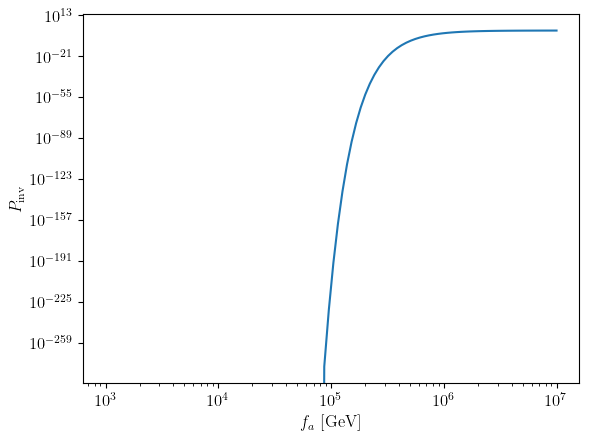

In [21]:
plt.loglog(fa, prob_decay)
plt.xlabel(r'$f_a$ [GeV]')
plt.ylabel(r'$ P_\mathrm{inv}$')

In [59]:
expcentral = belleII_bptoknunu_lightmediator.get_central(x_ma)
expsigmal = belleII_bptoknunu_lightmediator.get_sigma_left(x_ma)
expsigmar = belleII_bptoknunu_lightmediator.get_sigma_right(x_ma)

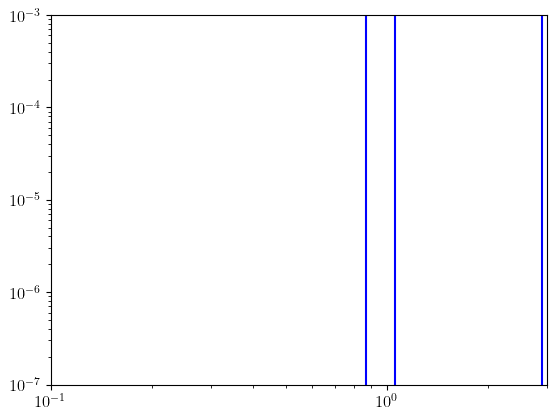

In [60]:
plt.contour(x_ma, 1/y_fa, br-(expcentral-expsigmal), levels=[0], colors='b')
plt.contour(x_ma, 1/y_fa, br-(expcentral+expsigmal), levels=[0], colors='b')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

In [61]:
from alpaca.statistics.chisquared import combine_chi2
from alpaca.statistics.functions import nsigmas

In [62]:
chi2tot_bknunu = combine_chi2(chi2_bknunu_belleII, chi2_bknunu_babar)

Text(0.5, 1.0, '$B^+ \\to K^+ a$ at Belle II, QED-DFSZ with $\\tan\\beta = 10000$')

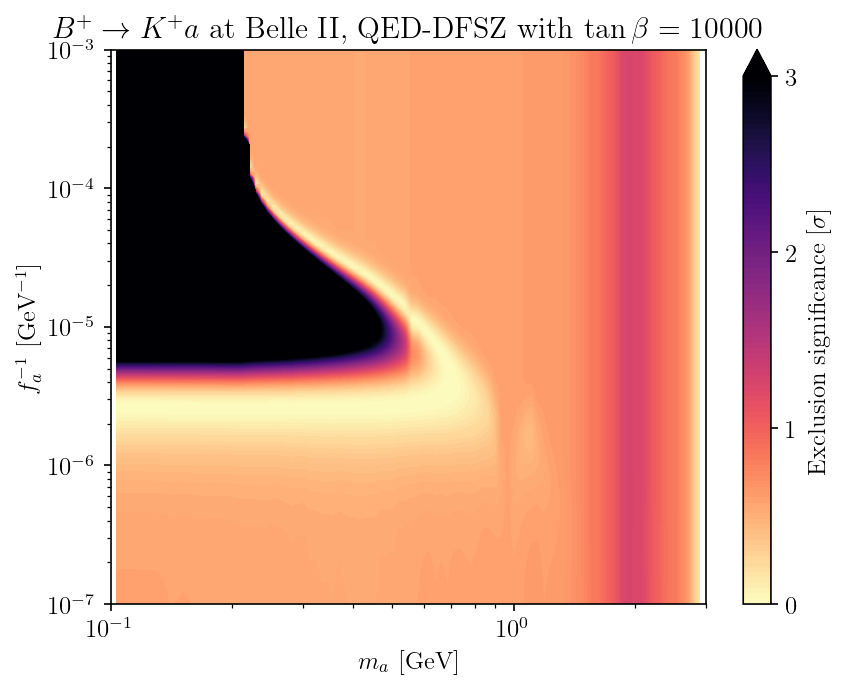

In [73]:
plt.figure(dpi=150)
pl = plt.contourf(x_ma, 1/y_fa, nsigmas(np.real(chi2_bknunu_belleII),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
#plt.contour(x_ma, 1/y_fa, br-(expcentral-expsigmal), levels=[0], colors='b')
#plt.contour(x_ma, 1/y_fa, br-(expcentral+expsigmal), levels=[0], colors='b')
#plt.contourf(x_ma, 1/y_fa, np.real(prob_decay), levels=[0.9, 1.0], colors='g', alpha=0.3)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.title(r'$B^+ \to K^+ a$ at Belle II, QED-DFSZ with $\tan\beta = 10000$')

Text(0.5, 1.0, '$B \\to K a$ at BaBar, QED-DFSZ with $\\tan\\beta = 10000$')

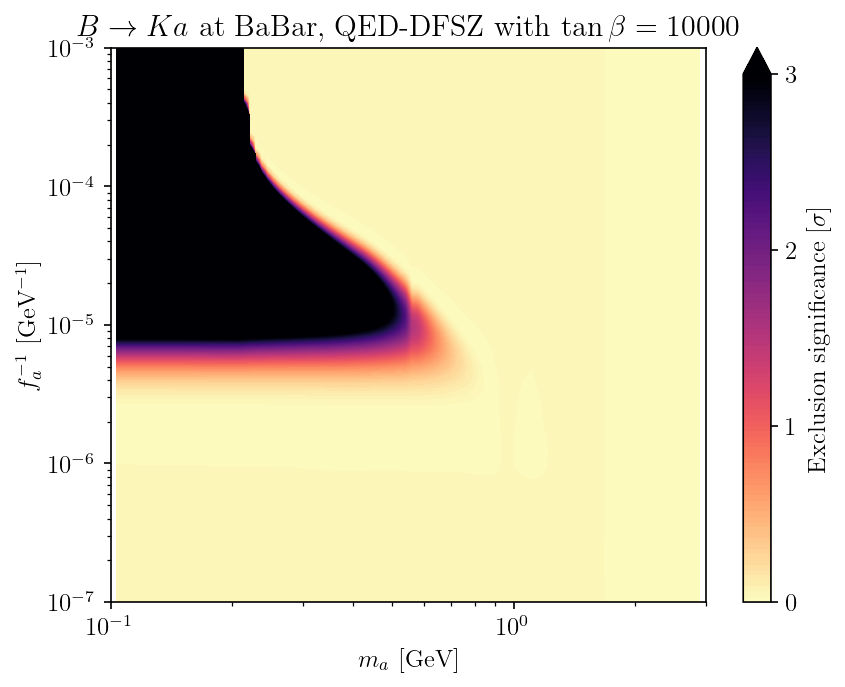

In [74]:
plt.figure(dpi=150)
pl = plt.contourf(x_ma, 1/y_fa, nsigmas(np.real(chi2_bknunu_babar),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.title(r'$B \to K a$ at BaBar, QED-DFSZ with $\tan\beta = 10000$')

Text(0.5, 1.0, '$B \\to K a$, QED-DFSZ with $\\tan\\beta = 10000$')

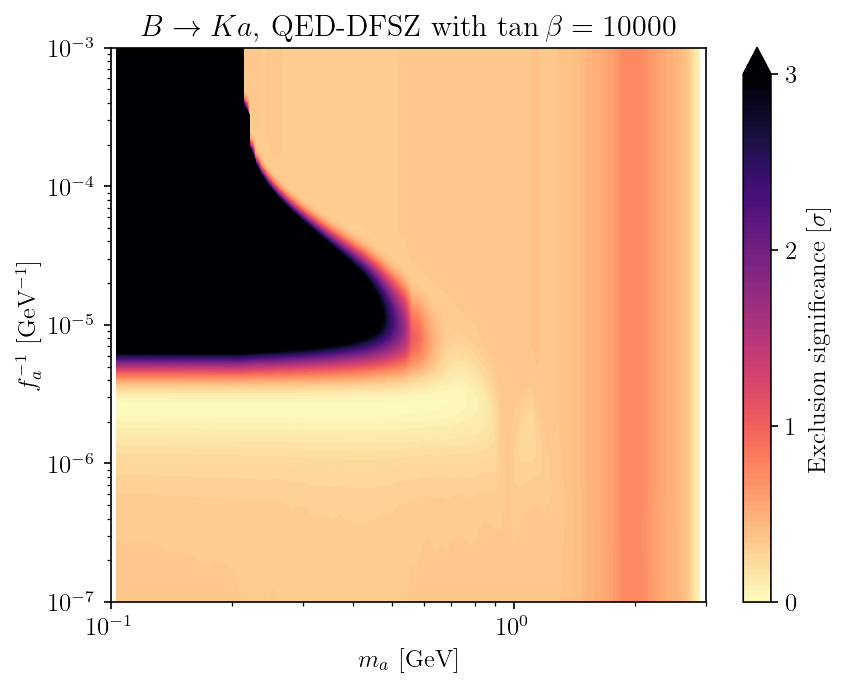

In [75]:
plt.figure(dpi=150)
pl = plt.contourf(x_ma, 1/y_fa, nsigmas(np.real(chi2tot_bknunu),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.title(r'$B \to K a$, QED-DFSZ with $\tan\beta = 10000$')

In [76]:
couplings = [QED_DFSZ.get_couplings({beta: np.pi/4}, f).match_run(3, 'VA_below', 'leadinglog') for f in fa]
x_ma, y_couplings = np.meshgrid(ma, couplings)
x_ma, y_fa = np.meshgrid(ma, fa)

In [77]:
chi2_bknunu_belleII = chi2_obs(belleII_bptoknunu_lightmediator, 'B+ -> K+ a', x_ma, y_couplings, y_fa, integrator='no_rge' )

/home/geonosis/Documents/alpaca/alp-aca/alpaca/decays/alp_decays/hadronic_decays_def.py:466: RuntimeWarning: invalid value encountered in scalar power
  return 9*ma**3/((4*np.pi)**5*fa**2)*(1-4*momega**2/ma**2)**(3/2)*np.abs(aux)**2
/home/geonosis/.cache/pypoetry/virtualenvs/alpaca-YZhijjtZ-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2458: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])


In [78]:
chi2_bknunu_babar = chi2_obs(babar_btoksnunu_lightmediator, 'B+ -> K+ a', x_ma, y_couplings, y_fa, integrator='no_rge' )

/home/geonosis/.cache/pypoetry/virtualenvs/alpaca-YZhijjtZ-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2458: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])


In [79]:
chi2tot_bknunu = combine_chi2(chi2_bknunu_belleII, chi2_bknunu_babar)

Text(0.5, 1.0, '$B \\to K a$, QED-DFSZ with $\\tan\\beta = 1$')

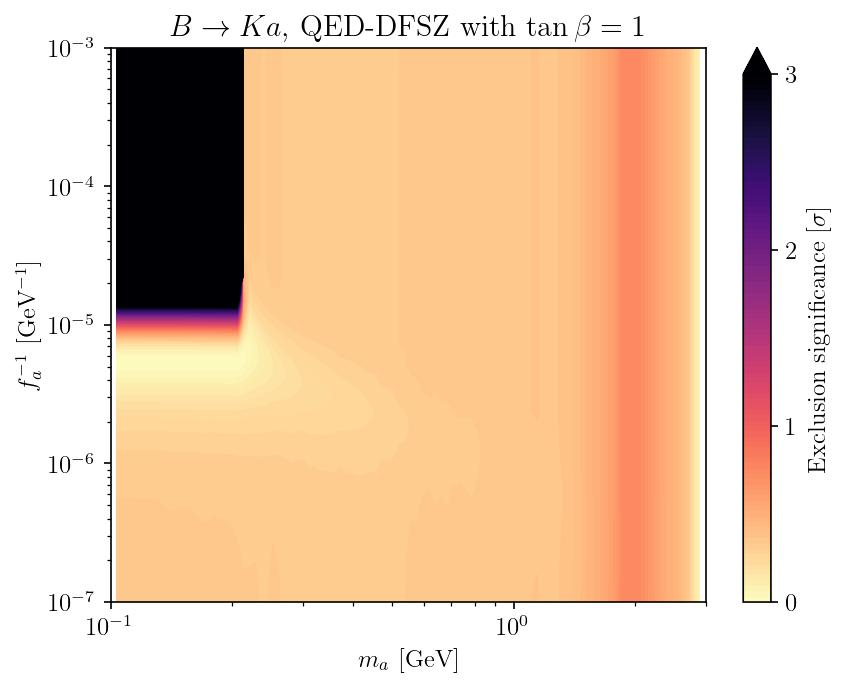

In [80]:
plt.figure(dpi=150)
pl = plt.contourf(x_ma, 1/y_fa, nsigmas(np.real(chi2tot_bknunu),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.title(r'$B \to K a$, QED-DFSZ with $\tan\beta = 1$')

## $u$-DFSZ

In [81]:
couplings = [u_DFSZ.get_couplings({beta: np.pi/4}, f).match_run(3, 'VA_below', 'leadinglog') for f in fa]

In [82]:
x_ma, y_couplings = np.meshgrid(ma, couplings)
x_ma, y_fa = np.meshgrid(ma, fa)

In [83]:
chi2_bknunu_belleII = chi2_obs(belleII_bptoknunu_lightmediator, 'B+ -> K+ a', x_ma, y_couplings, y_fa, integrator='no_rge' )

/home/geonosis/Documents/alpaca/alp-aca/alpaca/decays/alp_decays/hadronic_decays_def.py:466: RuntimeWarning: invalid value encountered in scalar power
  return 9*ma**3/((4*np.pi)**5*fa**2)*(1-4*momega**2/ma**2)**(3/2)*np.abs(aux)**2
/home/geonosis/.cache/pypoetry/virtualenvs/alpaca-YZhijjtZ-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2458: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])


In [84]:
chi2_bknunu_babar = chi2_obs(babar_btoksnunu_lightmediator, 'B+ -> K+ a', x_ma, y_couplings, y_fa, integrator='no_rge' )

/home/geonosis/.cache/pypoetry/virtualenvs/alpaca-YZhijjtZ-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2458: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])


In [85]:
chi2tot_bknunu = combine_chi2(chi2_bknunu_belleII, chi2_bknunu_babar)

Text(0.5, 1.0, '$B^+ \\to K^+ a$ at Belle II, $u$-DFSZ with $\\tan\\beta = 1$')

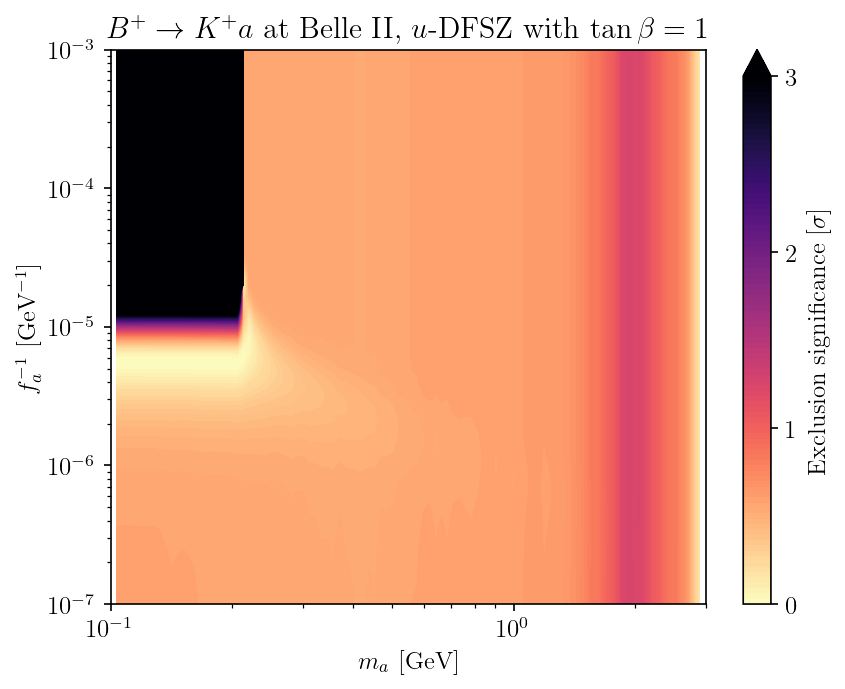

In [86]:
plt.figure(dpi=150)
pl = plt.contourf(x_ma, 1/y_fa, nsigmas(np.real(chi2_bknunu_belleII),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.title(r'$B^+ \to K^+ a$ at Belle II, $u$-DFSZ with $\tan\beta = 1$')

Text(0.5, 1.0, '$B \\to K a$ at BaBar, $u$-DFSZ with $\\tan\\beta = 1$')

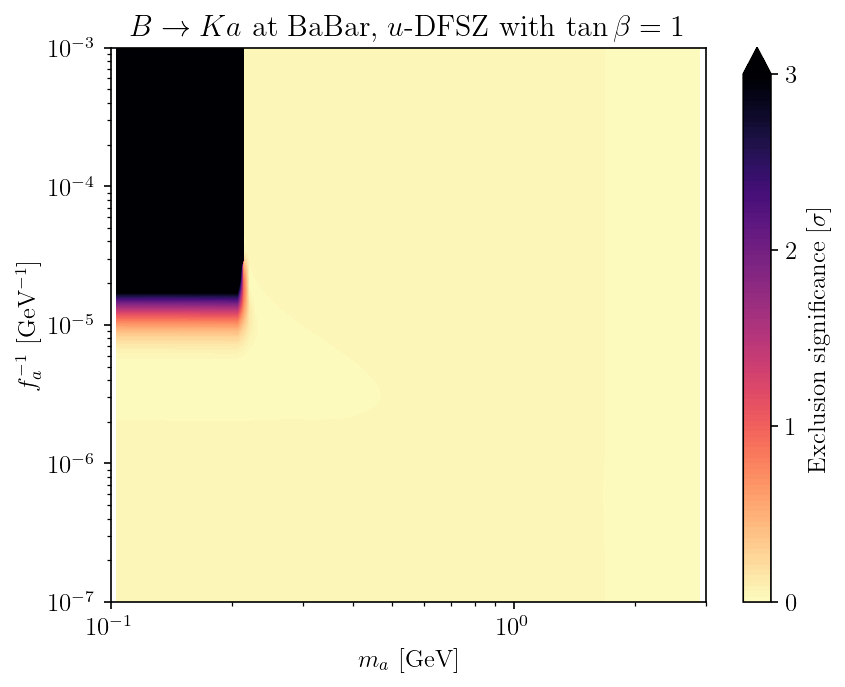

In [87]:
plt.figure(dpi=150)
pl = plt.contourf(x_ma, 1/y_fa, nsigmas(np.real(chi2_bknunu_babar),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.title(r'$B \to K a$ at BaBar, $u$-DFSZ with $\tan\beta = 1$')

Text(0.5, 1.0, '$B \\to K a$, $u$-DFSZ with $\\tan\\beta = 1$')

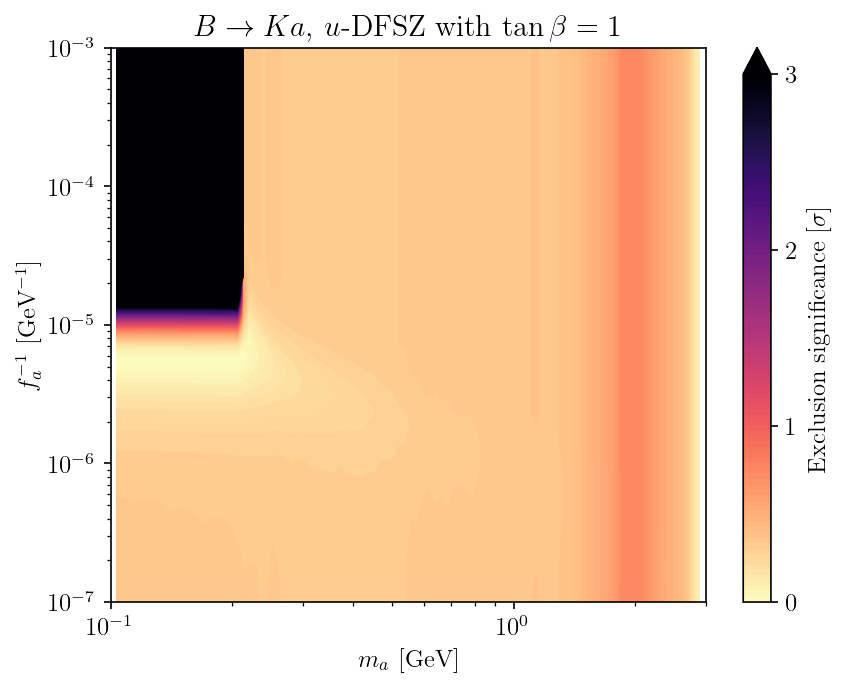

In [88]:
plt.figure(dpi=150)
pl = plt.contourf(x_ma, 1/y_fa, nsigmas(np.real(chi2tot_bknunu),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.title(r'$B \to K a$, $u$-DFSZ with $\tan\beta = 1$')

## $d$-DFSZ

In [89]:
couplings = [d_DFSZ.get_couplings({beta: np.pi/4}, f).match_run(3, 'VA_below', 'leadinglog') for f in fa]

In [90]:
x_ma, y_couplings = np.meshgrid(ma, couplings)
x_ma, y_fa = np.meshgrid(ma, fa)

In [91]:
chi2_bknunu_belleII = chi2_obs(belleII_bptoknunu_lightmediator, 'B+ -> K+ a', x_ma, y_couplings, y_fa, integrator='no_rge' )

/home/geonosis/Documents/alpaca/alp-aca/alpaca/decays/alp_decays/hadronic_decays_def.py:466: RuntimeWarning: invalid value encountered in scalar power
  return 9*ma**3/((4*np.pi)**5*fa**2)*(1-4*momega**2/ma**2)**(3/2)*np.abs(aux)**2
/home/geonosis/.cache/pypoetry/virtualenvs/alpaca-YZhijjtZ-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2458: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])


In [92]:
chi2_bknunu_babar = chi2_obs(babar_btoksnunu_lightmediator, 'B+ -> K+ a', x_ma, y_couplings, y_fa, integrator='no_rge' )

/home/geonosis/.cache/pypoetry/virtualenvs/alpaca-YZhijjtZ-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2458: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])


In [93]:
chi2tot_bknunu = combine_chi2(chi2_bknunu_belleII, chi2_bknunu_babar)

Text(0.5, 1.0, '$B^+ \\to K^+ a$ at Belle II, $d$-DFSZ with $\\tan\\beta = 1$')

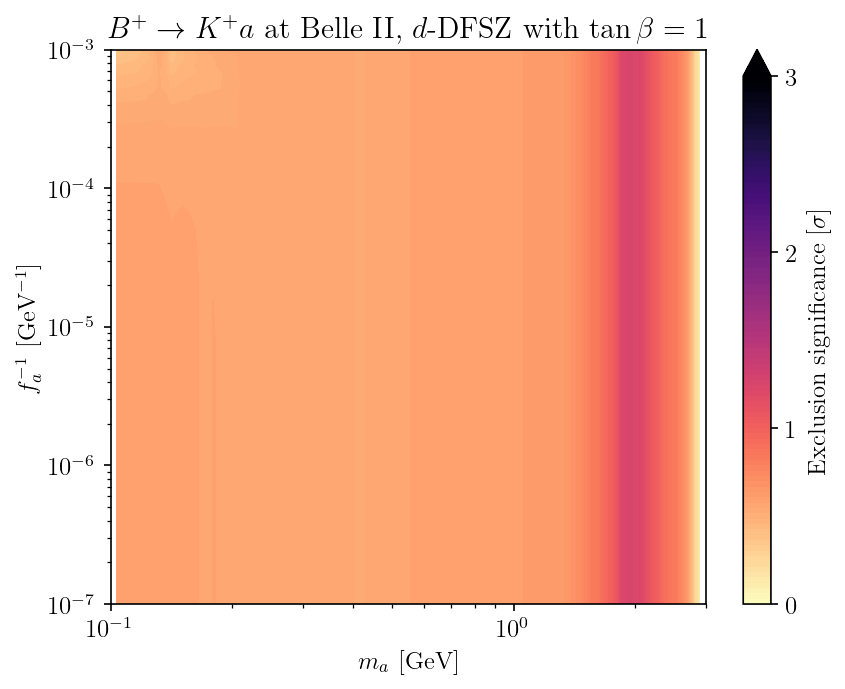

In [94]:
plt.figure(dpi=150)
pl = plt.contourf(x_ma, 1/y_fa, nsigmas(np.real(chi2_bknunu_belleII),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.title(r'$B^+ \to K^+ a$ at Belle II, $d$-DFSZ with $\tan\beta = 1$')

Text(0.5, 1.0, '$B \\to K a$ at BaBar, $d$-DFSZ with $\\tan\\beta = 1$')

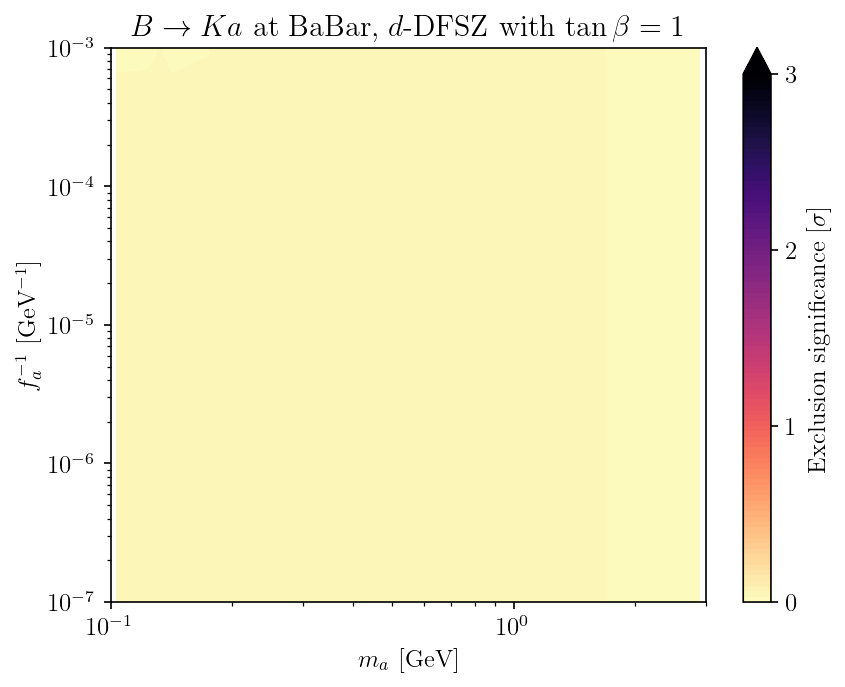

In [95]:
plt.figure(dpi=150)
pl = plt.contourf(x_ma, 1/y_fa, nsigmas(np.real(chi2_bknunu_babar),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.title(r'$B \to K a$ at BaBar, $d$-DFSZ with $\tan\beta = 1$')

Text(0.5, 1.0, '$B \\to K a$, $d$-DFSZ with $\\tan\\beta = 1$')

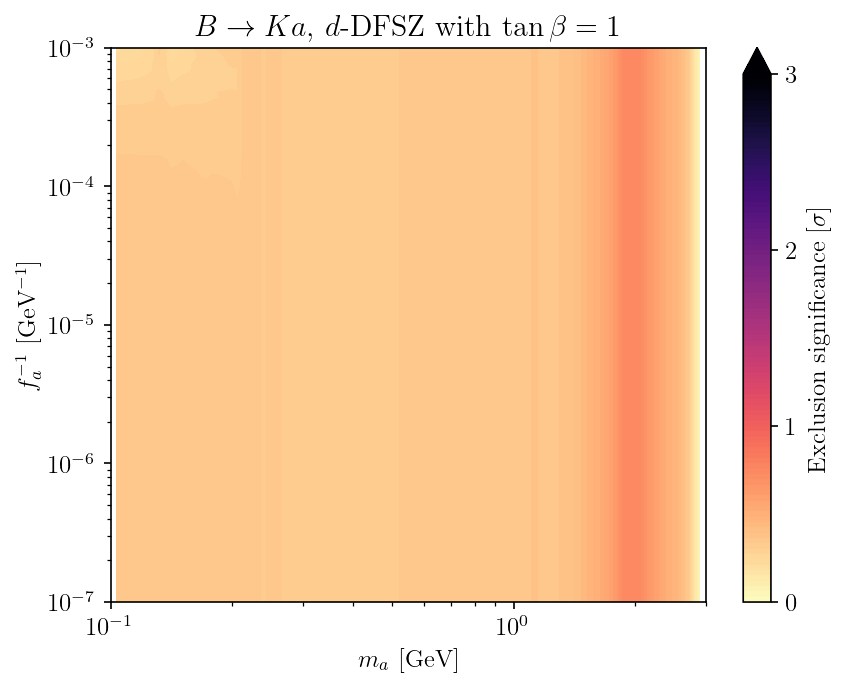

In [96]:
plt.figure(dpi=150)
pl = plt.contourf(x_ma, 1/y_fa, nsigmas(np.real(chi2tot_bknunu),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.title(r'$B \to K a$, $d$-DFSZ with $\tan\beta = 1$')